#### **Library & utils**

#### **Dataset**

In [1]:
import os
import warnings
# import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

warnings.filterwarnings('ignore')

pd.set_option("display.max_colwidth", 200)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:

training_metrics = {
    "train": {
        "f1": 0.89,
        "roc_auc": 0.99
    },
    "test": {
        "f1": 0.56,
        "roc_auc": 0.75
    }
}


items = training_metrics.items()
metrics = [list(v.values()) for _, v in items]
columns =  next(iter([list(c.keys()) for _, c in items]))
index =  [k for k, _ in items]
scores = pd.DataFrame(metrics, index=index, columns=columns)

scores

,f1,roc_auc
train,0.89,0.99
test,0.56,0.75


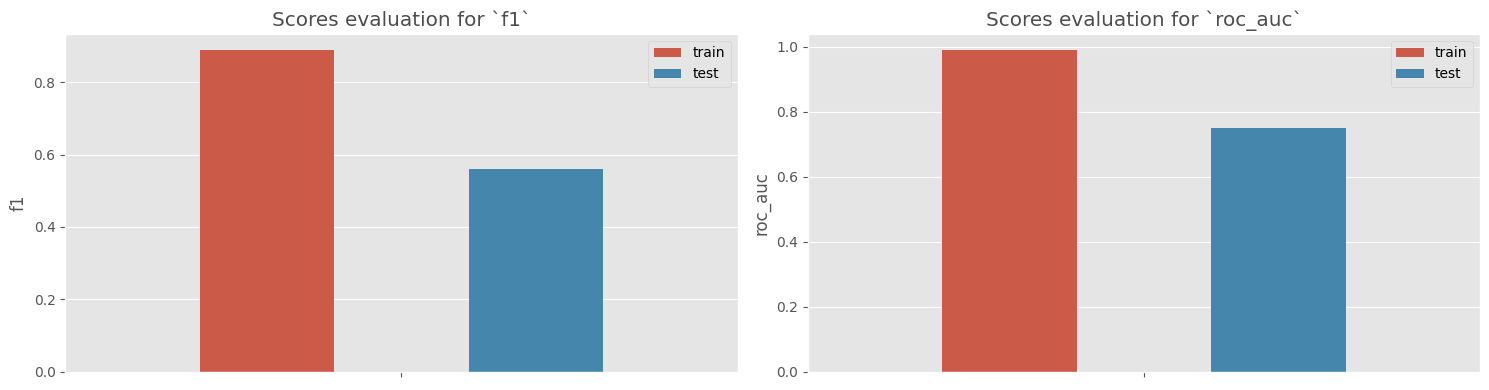

In [82]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

for i, c in enumerate(columns):
    plot = sns.barplot(scores, y=c, hue=scores.index, ax=ax[i], gap=0.5)
    ax[i].set_title(f"Scores evaluation for `{c}`", alpha=0.7, fontweight=10)
    ax[i].legend()

plt.tight_layout()
plt.show()

In [6]:
# "https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/data"
def download_dataset(URL: str) -> pd.DataFrame:

    training_path = Path(f"{URL}/Corona_NLP_train.csv")
    testing_path = Path(f"{URL}/Corona_NLP_test.csv")

    train_df = pd.read_csv(training_path, encoding="latin1")
    test_df = pd.read_csv(testing_path, encoding="latin1")

    return pd.concat([train_df, test_df], axis=0)

In [48]:
temp_df = data.head(200)
temp_df = temp_df.rename(columns=str.lower)
temp_df = temp_df[["originaltweet", "sentiment"]]
temp_df = temp_df.rename(columns={"originaltweet": "tweet"})
temp_df = temp_df.astype(str)
for c in temp_df.columns:
    temp_df[c] = temp_df[c].str.lower()
temp_df = temp_df.sample(frac=1, random_state=43).reset_index(drop=True)

temp_df.head()

,tweet,sentiment
0,"#toiletpaper shortage ??\r\r\ndon't believe everything you see on tv! my costco just now....,.#coronavirus https://t.co/fdvikzgfwd",negative
1,@howroute itâs not even over food... what the actual heck?? i have news for these people ... \r\r\n\r\r\nyou need food and water before you need the paper to wipe your a$$. just sayin.. ? \r\r\n\...,neutral
2,"trump said people must ""be vigilant,"" then concluded, ""be calm. it's really working out. and: lot of good things are going to happen. the consumer is ready. the consumer is so powerful in our coun...",extremely positive
3,"cdc: older folks should stock up on food, stay home amid #coronavirus - business insider wow! https://t.co/ygcpte7f1l",positive
4,"if 1,000,000 get infected with a 2% death rate for the #coronavirus then 20,000 will die in usa.\r\r\n\r\r\nif you dont have mo mney to stock up food, then find a fishing hole and supplies to hunt...",extremely negative


In [7]:
# Download and load the dataset
URL = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")
df = download_dataset(URL)

# Preprocess the data
df = df.rename(columns=str.lower)
df = df[["originaltweet", "sentiment"]]
df = df.rename(columns={"originaltweet": "tweet"})
df = df.astype(str)
for c in df.columns:
    df[c] = df[c].str.lower()
df = df.sample(frac=1, random_state=43).reset_index(drop=True)

df.head()

100%|██████████| 4.38M/4.38M [00:00<00:00, 112MB/s]

Extracting files...


,tweet,sentiment
0,"coronavirus latest:drivers in #nj, around country still seeing gas prices drop amid covid- - mar 21 @ 10:28 am et https://t.co/zxlzvhbyvw",negative
1,itâs a difficult time for everyone at the moment but please do not stockpile and panic buy.. if you just buy what you need as normal there will be plenty of food and essential supplies for everyo...,extremely positive
2,"or buy gift certificates for others who may be in self-quarantine. a little online shopping will pass the time and keep local businesses alive. plus, more books! #coronavirus #books",extremely positive
3,"""la rental prices fall for the first time in a decade.""\r\r\n#coronavirus #realestate #investment \r\r\n\r\r\nhttps://t.co/1hniyhoooa",neutral
4,covid-19 coronavirus: rotorua shoppers wear beekeeping suits to supermarket ????? https://t.co/qfpj5kzn1p,neutral


#### **Data Overview**

In [ ]:
# Data dimension
print("Dimension: ", df.shape)

Dimension:  (44955, 2)


In [10]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      44955 non-null  object
 1   sentiment  44955 non-null  object
dtypes: object(2)
memory usage: 702.5+ KB


In [11]:
# Missing and Duplicates
print("\nNumber of missing values:")
print(df.isna().sum())

print("\nNumber of duplicated values:")
print(df.duplicated().sum())


Number of missing values:
tweet        0
sentiment    0
dtype: int64

Number of duplicated values:
2


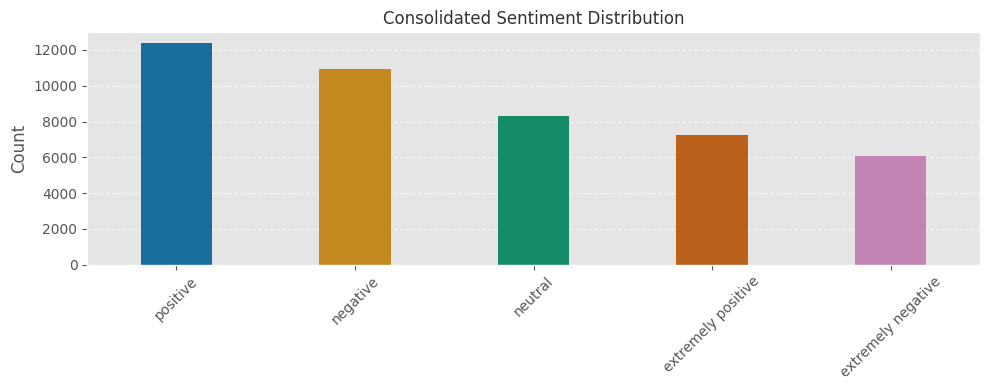

In [22]:
# Plot sentiment distributions
def plot_sentiment_dist(df: pd.DataFrame, palette="colorblind") -> None:

    sentiment_df = df["sentiment"].value_counts().reset_index(name="size")

    _, ax = plt.subplots(figsize=(10, 4))
    plt.style.use("ggplot")

    sns.barplot(
        sentiment_df, x="sentiment", y="size", hue="sentiment", palette=palette, gap=0.5, ax=ax
    )

    # Axis Labels and Title
    ax.set_title("Consolidated Sentiment Distribution", fontsize=12, alpha=0.8)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xlabel("")
    plt.xticks(rotation=45)

    ax.grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# All sentiments included
plot_sentiment_dist(df)

In [23]:
# Consolidate negative and postive sentiments

def consolidate_sentiment(sentiment: str) -> str:
    if sentiment == "extremely positive":
        return "positive"
    elif sentiment == "extremely negative":
        return "negative"
    return sentiment

data = df.copy()

data["sentiment"] = data["sentiment"].apply(consolidate_sentiment)

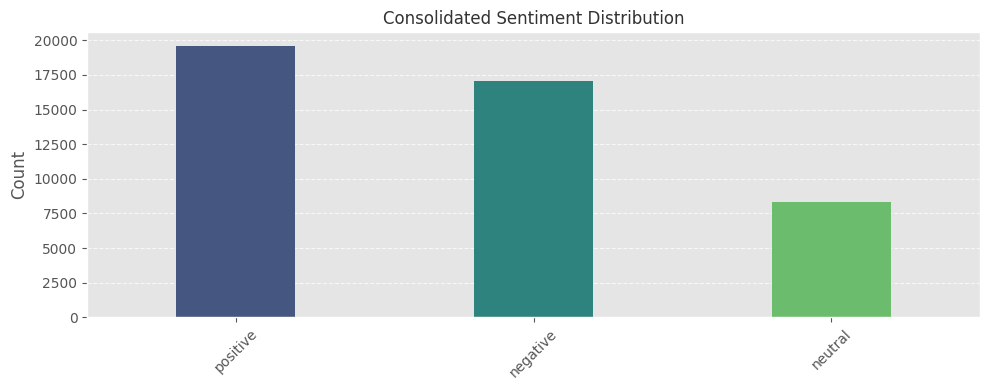

In [24]:
# consolidated
plot_sentiment_dist(data, "viridis")

#### **Data Processing & Cleaning**

In [ ]:
import re
import nltk
import string
import contractions
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [26]:
# Download NLTK resources
nltk.download("popular", quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

True

In [49]:
# Define Stopwords
covid_19_stopwords = ["covid", "coronavirus", "pandemic", "virus", "lockdown", "quarantine", "vaccine"]
custom_stopwords = covid_19_stopwords + stopwords.words()

# Lemmatizer
lemma = WordNetLemmatizer()

def preprocess_text(df: pd.DataFrame) -> pd.DataFrame:

    data = df.copy()

    # Clean the text
    data['text'] = data['tweet'].str.lower()
    data['text'] = data['text'].apply(contractions.fix)
    data['text'] = data['text'].str.replace(r'https:\W.+','', regex=True)
    data['text'] = data['text'].str.replace(r'@\w+|&\w+','', regex=True)
    data['text'] = data['text'].str.replace(r'[%s]'%re.escape(string.punctuation),' ', regex=True)
    data['text'] = data['text'].str.replace(r'\d+\w+','', regex=True)

    # Tokenize and preprocess
    data['text'] = data['text'].apply(word_tokenize)
    data['text'] = data['text'].apply(lambda tokens: [lemma.lemmatize(word) for word in tokens])
    data['text'] = data['text'].str.join(" ")

    # Handle encoding and decoding issues
    data['text'] = data['text'].apply(lambda s: s.encode('ascii', 'ignore'))
    data['text'] = data['text'].apply(lambda s: s.decode('utf-8'))

    # Remove stopwords (and potentially filter short words)
    data['text'] = data['text'].apply(lambda text: [word for word in text.split() if word not in custom_stopwords and len(word) > 2])
    data['text'] = data['text'].str.join(" ")
    return data[['tweet', 'text', 'sentiment']]

NameError: name 'stopwords' is not defined

In [28]:
# Define Stopwords
covid_19_stopwords = ["covid", "coronavirus", "pandemic", "virus", "lockdown", "quarantine", "vaccine"]
custom_stopwords = covid_19_stopwords + stopwords.words()

# Lemmatizer
lemma = WordNetLemmatizer()

def preprocess_text(df: pd.DataFrame) -> pd.DataFrame:

    data = df.copy()

    # Clean the text
    data['text'] = data['tweet'].str.lower()
    data['text'] = data['text'].apply(contractions.fix)
    data['text'] = data['text'].str.replace(r'https:\W.+','', regex=True)
    data['text'] = data['text'].str.replace(r'@\w+|&\w+','', regex=True)
    data['text'] = data['text'].str.replace(r'[%s]'%re.escape(string.punctuation),' ', regex=True)
    data['text'] = data['text'].str.replace(r'\d+\w+','', regex=True)

    # Tokenize and preprocess
    data['text'] = data['text'].apply(word_tokenize)
    data['text'] = data['text'].apply(lambda tokens: [lemma.lemmatize(word) for word in tokens])
    data['text'] = data['text'].str.join(" ")

    # Handle encoding and decoding issues
    data['text'] = data['text'].apply(lambda s: s.encode('ascii', 'ignore'))
    data['text'] = data['text'].apply(lambda s: s.decode('utf-8'))

    # Remove stopwords (and potentially filter short words)
    data['text'] = data['text'].apply(lambda text: [word for word in text.split() if word not in custom_stopwords and len(word) > 2])
    data['text'] = data['text'].str.join(" ")
    return data[['tweet', 'text', 'sentiment']]

# Processed DataSet
dataframe = preprocess_text(data)
dataframe = (
    dataframe[~(dataframe.text.str.split()
    .apply(lambda s: len(s)) < 2)]
    .dropna().drop_duplicates()
    .reset_index(drop=True)
)

dataframe.head()

,tweet,text,sentiment
0,"coronavirus latest:drivers in #nj, around country still seeing gas prices drop amid covid- - mar 21 @ 10:28 am et https://t.co/zxlzvhbyvw",latest driver country gas price drop amid,negative
1,itâs a difficult time for everyone at the moment but please do not stockpile and panic buy.. if you just buy what you need as normal there will be plenty of food and essential supplies for everyo...,difficult time moment stockpile panic buy buy normal plenty food essential supply thinkofothers especially elderly dontbeselfish,positive
2,"or buy gift certificates for others who may be in self-quarantine. a little online shopping will pass the time and keep local businesses alive. plus, more books! #coronavirus #books",buy gift certificate online shopping time local business alive book book,positive
3,"""la rental prices fall for the first time in a decade.""\r\r\n#coronavirus #realestate #investment \r\r\n\r\r\nhttps://t.co/1hniyhoooa",rental price fall time decade realestate investment,neutral
4,covid-19 coronavirus: rotorua shoppers wear beekeeping suits to supermarket ????? https://t.co/qfpj5kzn1p,rotorua shopper wear beekeeping suit supermarket,neutral


#### **Save Processed Data**

In [33]:
%%bash
# Create processed folder only if it does not exist in the folder tree.
FILE_DIR="data/processed"

if [[ ! -d "$FILE_DIR" ]]; then
    echo "Create '$FILE_DIR' folder ..."
    mkdir -p "${FILE_DIR}"
else
    echo "Folder '$FILE_DIR' already exists."
fi

Folder 'data/processed' already exists.


In [32]:
# !rm -rf data/processed/covid19_tweets.csv

In [34]:
# Naming file output
FILE_NAME = "covid19_tweets.csv"
FILE_OUTPUT = os.path.join("data/processed", FILE_NAME)

# Log existing files into file_log.txt
!find . -maxdepth 2 -type f > file_log.txt

# Load existing files into a pyton list
with open("file_log.txt", "r") as f:
    list_files = [file.split("/")[-1].rstrip() for file in f.readlines()]
    print(list_files)

['description', 'packed-refs', 'HEAD', 'config', 'COMMIT_EDITMSG', 'FETCH_HEAD', 'ORIG_HEAD', 'index', '.gitignore', 'file_log.txt', 'train.sh', 'cleaning.sh', 'prepare.sh', 'set_env.sh', 'utils.py', 'train.pyc', 'leaning.py', 'prepare.py', 'evaluate.py', 'Dockerfile', 'params.yml', 'Jenkinsfile.main', 'Jenkinsfile.unittest', 'notebook_v002.ipynb', 'notebook_v003.ipynb', 'notebook_v001.ipynb', 'README.md']


In [35]:
if FILE_NAME not in list_files:
    print("Saving processed dataset ...")
    dataframe.to_csv(FILE_OUTPUT, index=False)
else:
    print(f"File '{FILE_OUTPUT}' already created.")

Saving processed dataset ...


In [2]:
data = {
    "vectorizer": {
        "params": {
            "ngram_range": [
                1,
                1
            ],
            "norm": "l2"
        },
        "f1_weighted": 0.5976723779715305,
        "roc_auc_ovo": 0.7687833765580905
    },
    "model": {
        "params": {
            "C": 2.0,
            "max_iter": 1750,
            "penalty": "l2",
            "solver": "saga"
        },
        "f1_weighted": 0.6116663971952389,
        "roc_auc_ovo": 0.7714629148080565
    }
}
